# <center><h1 style="font-family: Times New Roman; color: black;">Logistic Regression</h1></center>

# 1. Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA).

b. Examine the features, their types, and summary statistics.

c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

Analyze any patterns or correlations observed in the data.

# 2. Data Preprocessing:
a. Handle missing values (e.g., imputation).

b. Encode categorical variables.

# 3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

b. Train the model using the training data.

# 4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

Visualize the ROC curve.

# 5. Interpretation:
a. Interpret the coefficients of the logistic regression model.

b. Discuss the significance of features in predicting the target variable (survival probability in this case).

# 6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit.

The deployment can be done locally or online via Streamlit Share. 

Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 

# Solutions:

# 1. Data Exploration

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Titanic dataset
train_df = pd.read_csv('Titanic_train.csv')
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
test_df = pd.read_csv('Titanic_test.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Check for missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Summary statistics
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

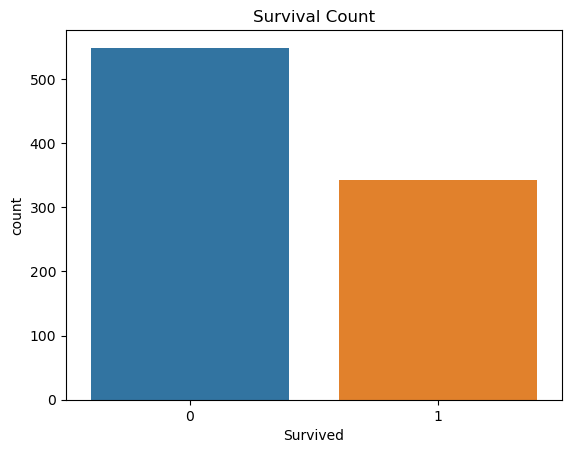

In [6]:
# Exploratory Data Analysis (EDA)
# Visualize the distribution of the 'Survived' variable
sns.countplot(data=train_df, x='Survived')
plt.title('Survival Count')
plt.show()

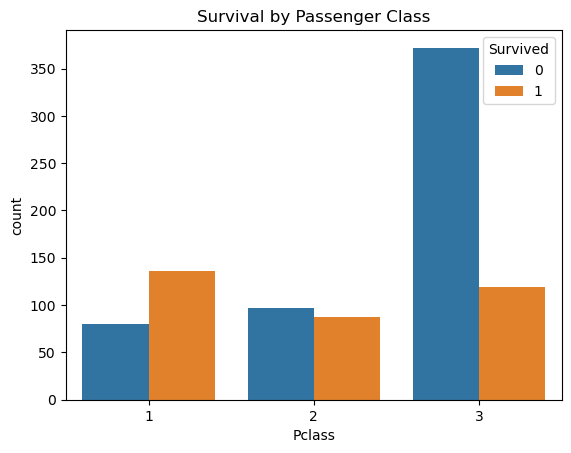

In [7]:
# Visualize the relationship between 'Survived' and 'Pclass' (Passenger Class)
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

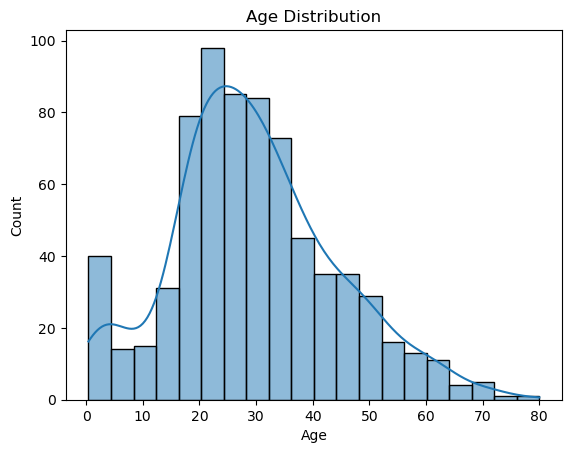

In [8]:
# Visualize the distribution of Age
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

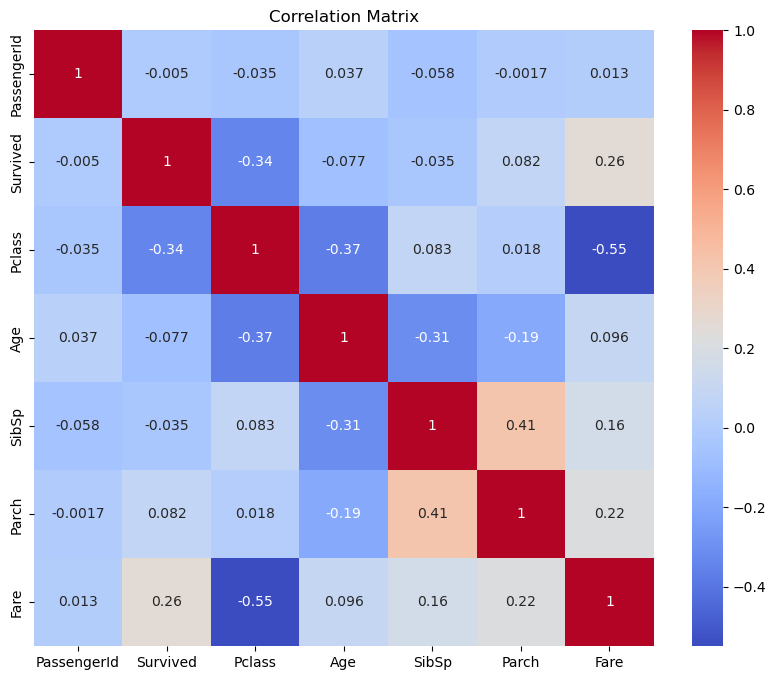

In [9]:
# Visualize the correlation matrix
corr_matrix = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 2. Data Preprocessing


In [10]:
# Handle missing 'Age' values by filling with the median value

# Fill missing 'Age' values in both train and test datasets with the median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Check the result to ensure missing 'Age' values are filled
print("Missing values in 'Age' after filling:")
print(train_df['Age'].isnull().sum(), "in train data")
print(test_df['Age'].isnull().sum(), "in test data")

Missing values in 'Age' after filling:
0 in train data
0 in test data


In [11]:
# Check if 'Embarked' column exists in the train and test datasets
print("Columns in train dataset:", train_df.columns)
print("Columns in test dataset:", test_df.columns)
# If the 'Embarked' column exists, fill missing values, otherwise skip this step
if 'Embarked' in train_df.columns:
    train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
else:
    print("'Embarked' column not found in train dataset.")

if 'Embarked' in test_df.columns:
    test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)
else:
    print("'Embarked' column not found in test dataset.")

Columns in train dataset: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Columns in test dataset: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [12]:
# Check if 'Cabin' column exists before dropping it
if 'Cabin' in train_df.columns:
    train_df.drop(columns=['Cabin'], inplace=True)
    print("'Cabin' column dropped from train dataset.")
else:
    print("'Cabin' column not found in train dataset.")

if 'Cabin' in test_df.columns:
    test_df.drop(columns=['Cabin'], inplace=True)
    print("'Cabin' column dropped from test dataset.")
else:
    print("'Cabin' column not found in test dataset.")

# Verify that 'Cabin' column has been dropped
print("Remaining columns in train dataset:", train_df.columns)
print("Remaining columns in test dataset:", test_df.columns)

'Cabin' column dropped from train dataset.
'Cabin' column dropped from test dataset.
Remaining columns in train dataset: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
Remaining columns in test dataset: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [13]:
# Check if 'Embarked' column exists before applying one-hot encoding
if 'Embarked' in train_df.columns:
    train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
    print("'Embarked' column encoded in train dataset.")
else:
    print("'Embarked' column not found in train dataset.")

if 'Embarked' in test_df.columns:
    test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)
    print("'Embarked' column encoded in test dataset.")
else:
    print("'Embarked' column not found in test dataset.")

# Check the processed data
train_df.head()
test_df.head()

'Embarked' column encoded in train dataset.
'Embarked' column encoded in test dataset.


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare  Embarked_Q  Embarked_S  
0  34.5      0      0   330911   7.8292           1           0  
1  47.0      1      0   363272   7.0000           0           1  
2  62.0      0      0   240276   9.6875           1           0  
3  27.0      0      0   315154   8.6625           0           1  
4  22.0      1      1  3101298  12.2875           0           1

In [14]:
# Feature selection

# Drop unnecessary columns such as 'Name', 'Ticket', and 'PassengerId' since they don't contribute to the model
X_train = train_df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y_train = train_df['Survived']

# For the test set, we'll use the same columns as in X_train
X_test = test_df.drop(columns=['Name', 'Ticket', 'PassengerId'])

# Check the first few rows of X_train and X_test
X_train.head()
X_test.head()

Pclass     Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0       3    male  34.5      0      0   7.8292           1           0
1       3  female  47.0      1      0   7.0000           0           1
2       2    male  62.0      0      0   9.6875           1           0
3       3    male  27.0      0      0   8.6625           0           1
4       3  female  22.0      1      1  12.2875           0           1

# 3. Model Building

In [18]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
# Load the Titanic dataset
train_df = pd.read_csv('Titanic_train.csv')
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [20]:

# Drop irrelevant columns for model training ('Name', 'Ticket', 'Cabin')
X = train_df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_df['Survived']

# Encode categorical variables (Sex and Embarked)
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X['Embarked'] = X['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Handle missing values (fill Age with median, Embarked with mode)
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)

# Display first few rows of prepared data
X.head()

PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1       3    0  22.0      1      0   7.2500       0.0
1            2       1    1  38.0      1      0  71.2833       1.0
2            3       3    1  26.0      0      0   7.9250       0.0
3            4       1    1  35.0      1      0  53.1000       0.0
4            5       3    0  35.0      0      0   8.0500       0.0

In [21]:
# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the split data
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (712, 8)
Validation set shape: (179, 8)


In [22]:
# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model on the training data
logreg.fit(X_train, y_train)

# Print confirmation after training
print("Logistic Regression model training complete.")

Logistic Regression model training complete.


In [23]:
# Make predictions on the validation set
y_pred = logreg.predict(X_val)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 79.89%


# 4. Model Evaluation

In [24]:
# Import additional libraries for evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [25]:
# Make predictions on the validation set
y_pred = logreg.predict(X_val)
y_prob = logreg.predict_proba(X_val)[:, 1]  # Probability scores for the ROC-AUC

# Calculate accuracy, precision, recall, F1-score, and ROC-AUC
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_prob)

# Print the evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'ROC-AUC Score: {roc_auc * 100:.2f}%')

Accuracy: 79.89%
Precision: 77.14%
Recall: 72.97%
F1 Score: 75.00%
ROC-AUC Score: 87.76%


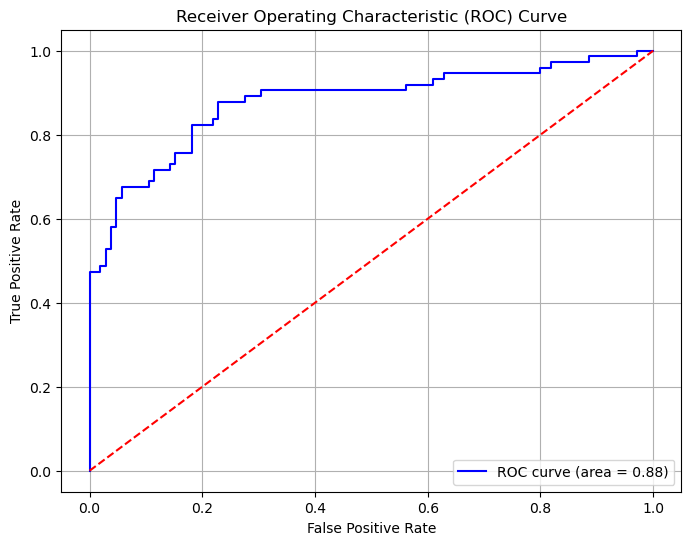

In [26]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 5. Interpretation

In [27]:
# Get the feature names and corresponding coefficients
feature_names = X_train.columns
coefficients = logreg.coef_[0]

# Create a DataFrame to display the feature names and their coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by their absolute values to see the most significant features
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Display the coefficients
print(coef_df)

       Feature  Coefficient
2          Sex     2.597905
7     Embarked     0.223312
6         Fare     0.002900
0  PassengerId     0.000356
3          Age    -0.031155
5        Parch    -0.110516
4        SibSp    -0.294858
1       Pclass    -0.953479


In [29]:
# Interpret each coefficient
for index, row in coef_df.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    if coef > 0:
        print(f"{feature}: A positive coefficient of {coef:.4f} suggests that higher values of this feature increase the likelihood of survival.")
    else:
        print(f"{feature}: A negative coefficient of {coef:.4f} suggests that higher values of this feature decrease the likelihood of survival.")

Sex: A positive coefficient of 2.5979 suggests that higher values of this feature increase the likelihood of survival.
Embarked: A positive coefficient of 0.2233 suggests that higher values of this feature increase the likelihood of survival.
Fare: A positive coefficient of 0.0029 suggests that higher values of this feature increase the likelihood of survival.
PassengerId: A positive coefficient of 0.0004 suggests that higher values of this feature increase the likelihood of survival.
Age: A negative coefficient of -0.0312 suggests that higher values of this feature decrease the likelihood of survival.
Parch: A negative coefficient of -0.1105 suggests that higher values of this feature decrease the likelihood of survival.
SibSp: A negative coefficient of -0.2949 suggests that higher values of this feature decrease the likelihood of survival.
Pclass: A negative coefficient of -0.9535 suggests that higher values of this feature decrease the likelihood of survival.


# 6. Deployment with Streamlit

In [30]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
#import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib

In [4]:
# Load the Titanic dataset
train_df = pd.read_csv('Titanic_train.csv')
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
# Drop irrelevant columns for model training ('Name', 'Ticket', 'Cabin')
X = train_df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_df['Survived']

# Encode categorical variables (Sex and Embarked)
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X['Embarked'] = X['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Handle missing values (fill Age with median, Embarked with mode)
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model on the training data
logreg.fit(X_train, y_train)

# Print confirmation after training
print("Logistic Regression model training complete.")

Logistic Regression model training complete.


In [9]:
print(X_train.columns)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [7]:
# Save the trained model to a file
joblib.dump(logreg, 'titanic_logistic_regression_model.pkl')

# Print confirmation
print("Model saved successfully.")

Model saved successfully.


# Streamlit Titanic Prediction App Deployment
This notebook documents the steps to create and deploy a Titanic prediction app using **Streamlit** and **ngrok**.
The app uses a logistic regression model to predict the survival of passengers on the Titanic.

# Deploying the Streamlit App Using ngrok

To share the Streamlit app, we use **ngrok** to expose the app running on `localhost`.

### Steps:

1. **Start the Streamlit App**:
   In the terminal, run:
   ```bash
   streamlit run titanic_app.py
   
2. Run ngrok to create a public URL: In another terminal window, run:

       ngrok http 8501


# Link to check Deployment with Streamlit
https://6dca-2401-4900-1c60-e098-3564-33a5-28e9-19c0.ngrok-free.app

<center>
    <h1 style="font-family: 'Cursive'; 
               font-size: 150px; 
               color: Yellow; 
               text-shadow: 0 0 10px #0000FF, 0 0 20px #0000FF, 0 0 30px #0000FF;">
        Thank You
    </h1>
</center>